In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import nichepca as npc
import torch

from src.utilities import *

from collections import Counter
import random
from tqdm import tqdm 

device = "cpu"
torch.set_num_threads(100)

seed = 200
torch.manual_seed(seed)

/home/byousefi/envs/nichepca/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
save_path = "data/"
# data_path = "/data/projects/robin/segmentation/xenium_outs/merged_processed_before_integration.h5ad"
data_path = "/data/projects/robin/segmentation/xenium_outs/merged_processed_cleaned.h5ad"

In [3]:
# Read data
adata = sc.read_h5ad(data_path)

In [4]:
slide_set = adata.obs['Slide_ID'].unique()
slide_set

['0011695', '0018775', '0011707', '0011287', '0011762', '0011284', '0011546', '0011216']
Categories (8, object): ['0011216', '0011284', '0011287', '0011546', '0011695', '0011707', '0011762', '0018775']

In [ ]:
# run domain pca
npc.wf.run_nichepca(adata, 
                    knn=5,
                    radius=None,
                    sample_key="Patient_Sample_ID", 
                    n_comps=30,
                    norm_per_sample = False,)

/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/utils/_helper.py:79: UserWarning: adata.X might not contain raw counts!
adata.X.max() = 3.471966505050659, adata.X.sum() = 63256964.0
  warn(
  2%|▏         | 1/63 [00:00<00:09,  6.56it/s]

----------- Graph Stats -----------
Number of nodes: 31336
Number of edges: 212506
Average in-degree: 6.781529426574707
Average out-degree: 6.781529426574707
Contains self-loops: True
Is undirected: True


  5%|▍         | 3/63 [00:00<00:10,  5.53it/s]

----------- Graph Stats -----------
Number of nodes: 103583
Number of edges: 700787
Average in-degree: 6.765463352203369
Average out-degree: 6.765463352203369
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 40527
Number of edges: 274605
Average in-degree: 6.775853157043457
Average out-degree: 6.775853157043457
Contains self-loops: True
Is undirected: True


  8%|▊         | 5/63 [00:00<00:09,  6.16it/s]

----------- Graph Stats -----------
Number of nodes: 53355
Number of edges: 360625
Average in-degree: 6.758973121643066
Average out-degree: 6.758973121643066
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 54631
Number of edges: 368887
Average in-degree: 6.752338409423828
Average out-degree: 6.752338409423828
Contains self-loops: True
Is undirected: True


 11%|█         | 7/63 [00:01<00:08,  6.61it/s]

----------- Graph Stats -----------
Number of nodes: 32350
Number of edges: 220498
Average in-degree: 6.816012382507324
Average out-degree: 6.816012382507324
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 69153
Number of edges: 468483
Average in-degree: 6.7745866775512695
Average out-degree: 6.7745866775512695
Contains self-loops: True
Is undirected: True


 13%|█▎        | 8/63 [00:01<00:07,  6.97it/s]

----------- Graph Stats -----------
Number of nodes: 43964
Number of edges: 301994
Average in-degree: 6.869120121002197
Average out-degree: 6.869120121002197
Contains self-loops: True
Is undirected: True


 17%|█▋        | 11/63 [00:01<00:07,  7.27it/s]

----------- Graph Stats -----------
Number of nodes: 92612
Number of edges: 622766
Average in-degree: 6.72446346282959
Average out-degree: 6.72446346282959
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 16857
Number of edges: 115095
Average in-degree: 6.827727317810059
Average out-degree: 6.827727317810059
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 48061
Number of edges: 323757
Average in-degree: 6.736376762390137
Average out-degree: 6.736376762390137
Contains self-loops: True
Is undirected: True


 21%|██        | 13/63 [00:01<00:06,  7.65it/s]

----------- Graph Stats -----------
Number of nodes: 48497
Number of edges: 331363
Average in-degree: 6.832649230957031
Average out-degree: 6.832649230957031
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 41537
Number of edges: 285865
Average in-degree: 6.882177352905273
Average out-degree: 6.882177352905273
Contains self-loops: True
Is undirected: True


 22%|██▏       | 14/63 [00:02<00:06,  7.90it/s]

----------- Graph Stats -----------
Number of nodes: 42138
Number of edges: 285974
Average in-degree: 6.7866058349609375
Average out-degree: 6.7866058349609375
Contains self-loops: True
Is undirected: True


 24%|██▍       | 15/63 [00:02<00:07,  6.21it/s]

----------- Graph Stats -----------
Number of nodes: 90153
Number of edges: 630737
Average in-degree: 6.996294975280762
Average out-degree: 6.996294975280762
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 21386
Number of edges: 146192
Average in-degree: 6.835874080657959
Average out-degree: 6.835874080657959
Contains self-loops: True
Is undirected: True


 29%|██▊       | 18/63 [00:02<00:06,  6.61it/s]

----------- Graph Stats -----------
Number of nodes: 86748
Number of edges: 587246
Average in-degree: 6.769562244415283
Average out-degree: 6.769562244415283
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 49495
Number of edges: 336167
Average in-degree: 6.791938781738281
Average out-degree: 6.791938781738281
Contains self-loops: True
Is undirected: True


 30%|███       | 19/63 [00:02<00:06,  6.59it/s]

----------- Graph Stats -----------
Number of nodes: 58441
Number of edges: 396541
Average in-degree: 6.7853217124938965
Average out-degree: 6.7853217124938965
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 35979
Number of edges: 243401
Average in-degree: 6.765085220336914
Average out-degree: 6.765085220336914
Contains self-loops: True
Is undirected: True


 35%|███▍      | 22/63 [00:03<00:05,  6.84it/s]

----------- Graph Stats -----------
Number of nodes: 62215
Number of edges: 420707
Average in-degree: 6.762147426605225
Average out-degree: 6.762147426605225
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 56620
Number of edges: 383574
Average in-degree: 6.774531841278076
Average out-degree: 6.774531841278076
Contains self-loops: True
Is undirected: True


 38%|███▊      | 24/63 [00:03<00:04,  8.21it/s]

----------- Graph Stats -----------
Number of nodes: 25770
Number of edges: 174302
Average in-degree: 6.763756275177002
Average out-degree: 6.763756275177002
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 34946
Number of edges: 237208
Average in-degree: 6.787844181060791
Average out-degree: 6.787844181060791
Contains self-loops: True
Is undirected: True


 41%|████▏     | 26/63 [00:03<00:04,  8.12it/s]

----------- Graph Stats -----------
Number of nodes: 54893
Number of edges: 374577
Average in-degree: 6.823766231536865
Average out-degree: 6.823766231536865
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 39099
Number of edges: 264487
Average in-degree: 6.7645463943481445
Average out-degree: 6.7645463943481445
Contains self-loops: True
Is undirected: True


 44%|████▍     | 28/63 [00:04<00:05,  6.58it/s]

----------- Graph Stats -----------
Number of nodes: 96535
Number of edges: 651573
Average in-degree: 6.749603748321533
Average out-degree: 6.749603748321533
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 45796
Number of edges: 312354
Average in-degree: 6.820551872253418
Average out-degree: 6.820551872253418
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 17897
Number of edges: 121699
Average in-degree: 6.799966335296631
Average out-degree: 6.799966335296631
Contains self-loops: True
Is undirected: True


 48%|████▊     | 30/63 [00:04<00:04,  7.10it/s]

----------- Graph Stats -----------
Number of nodes: 75259
Number of edges: 509851
Average in-degree: 6.774618148803711
Average out-degree: 6.774618148803711
Contains self-loops: True
Is undirected: True


 49%|████▉     | 31/63 [00:04<00:05,  6.29it/s]

----------- Graph Stats -----------
Number of nodes: 80628
Number of edges: 547474
Average in-degree: 6.7901225090026855
Average out-degree: 6.7901225090026855
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 2393
Number of edges: 16667
Average in-degree: 6.964897632598877
Average out-degree: 6.964897632598877
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 12184
Number of edges: 82550
Average in-degree: 6.7752790451049805
Average out-degree: 6.7752790451049805
Contains self-loops: True
Is undirected: True


 57%|█████▋    | 36/63 [00:05<00:02,  9.42it/s]

----------- Graph Stats -----------
Number of nodes: 46307
Number of edges: 314465
Average in-degree: 6.790874004364014
Average out-degree: 6.790874004364014
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 30562
Number of edges: 207376
Average in-degree: 6.785419940948486
Average out-degree: 6.785419940948486
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 32206
Number of edges: 215422
Average in-degree: 6.688878059387207
Average out-degree: 6.688878059387207
Contains self-loops: True
Is undirected: True


 60%|██████    | 38/63 [00:05<00:03,  8.05it/s]

----------- Graph Stats -----------
Number of nodes: 30626
Number of edges: 213592
Average in-degree: 6.974205017089844
Average out-degree: 6.974205017089844
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 58415
Number of edges: 394621
Average in-degree: 6.755473613739014
Average out-degree: 6.755473613739014
Contains self-loops: True
Is undirected: True


 65%|██████▌   | 41/63 [00:05<00:02,  7.74it/s]

----------- Graph Stats -----------
Number of nodes: 91118
Number of edges: 630206
Average in-degree: 6.916372299194336
Average out-degree: 6.916372299194336
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 24929
Number of edges: 168091
Average in-degree: 6.7427897453308105
Average out-degree: 6.7427897453308105
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 39103
Number of edges: 269249
Average in-degree: 6.8856353759765625
Average out-degree: 6.8856353759765625
Contains self-loops: True
Is undirected: True


 67%|██████▋   | 42/63 [00:05<00:02,  7.68it/s]

----------- Graph Stats -----------
Number of nodes: 45733
Number of edges: 309695
Average in-degree: 6.771805763244629
Average out-degree: 6.771805763244629
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 75277
Number of edges: 509711
Average in-degree: 6.771138668060303
Average out-degree: 6.771138668060303
Contains self-loops: True
Is undirected: True


 71%|███████▏  | 45/63 [00:06<00:02,  6.99it/s]

----------- Graph Stats -----------
Number of nodes: 61254
Number of edges: 416464
Average in-degree: 6.798968315124512
Average out-degree: 6.798968315124512
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 43826
Number of edges: 295304
Average in-degree: 6.738100528717041
Average out-degree: 6.738100528717041
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 15248
Number of edges: 104314
Average in-degree: 6.841159343719482
Average out-degree: 6.841159343719482
Contains self-loops: True
Is undirected: True


 76%|███████▌  | 48/63 [00:06<00:01,  8.36it/s]

----------- Graph Stats -----------
Number of nodes: 52400
Number of edges: 365878
Average in-degree: 6.982404708862305
Average out-degree: 6.982404708862305
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 41149
Number of edges: 278121
Average in-degree: 6.758876323699951
Average out-degree: 6.758876323699951
Contains self-loops: True
Is undirected: True


 79%|███████▉  | 50/63 [00:06<00:01,  7.91it/s]

----------- Graph Stats -----------
Number of nodes: 41327
Number of edges: 279439
Average in-degree: 6.761657238006592
Average out-degree: 6.761657238006592
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 59767
Number of edges: 404199
Average in-degree: 6.762912750244141
Average out-degree: 6.762912750244141
Contains self-loops: True
Is undirected: True


 83%|████████▎ | 52/63 [00:07<00:01,  7.78it/s]

----------- Graph Stats -----------
Number of nodes: 32419
Number of edges: 219313
Average in-degree: 6.764952659606934
Average out-degree: 6.764952659606934
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 65077
Number of edges: 437621
Average in-degree: 6.724664688110352
Average out-degree: 6.724664688110352
Contains self-loops: True
Is undirected: True


 84%|████████▍ | 53/63 [00:07<00:01,  7.69it/s]

----------- Graph Stats -----------
Number of nodes: 48123
Number of edges: 327407
Average in-degree: 6.803544998168945
Average out-degree: 6.803544998168945
Contains self-loops: True
Is undirected: True


 86%|████████▌ | 54/63 [00:07<00:01,  6.21it/s]

----------- Graph Stats -----------
Number of nodes: 96434
Number of edges: 666240
Average in-degree: 6.908766746520996
Average out-degree: 6.908766746520996
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 23516
Number of edges: 163928
Average in-degree: 6.970913410186768
Average out-degree: 6.970913410186768
Contains self-loops: True
Is undirected: True


 89%|████████▉ | 56/63 [00:07<00:01,  6.57it/s]

----------- Graph Stats -----------
Number of nodes: 80144
Number of edges: 543870
Average in-degree: 6.786159992218018
Average out-degree: 6.786159992218018
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 26153
Number of edges: 177735
Average in-degree: 6.7959699630737305
Average out-degree: 6.7959699630737305
Contains self-loops: True
Is undirected: True


 92%|█████████▏| 58/63 [00:08<00:00,  7.49it/s]

----------- Graph Stats -----------
Number of nodes: 44826
Number of edges: 304156
Average in-degree: 6.785258769989014
Average out-degree: 6.785258769989014
Contains self-loops: True
Is undirected: True


 97%|█████████▋| 61/63 [00:08<00:00,  5.88it/s]

----------- Graph Stats -----------
Number of nodes: 220837
Number of edges: 1486363
Average in-degree: 6.730588436126709
Average out-degree: 6.730588436126709
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 16602
Number of edges: 115846
Average in-degree: 6.977834224700928
Average out-degree: 6.977834224700928
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 41066
Number of edges: 280740
Average in-degree: 6.836312294006348
Average out-degree: 6.836312294006348
Contains self-loops: True
Is undirected: True


100%|██████████| 63/63 [00:08<00:00,  7.00it/s]

----------- Graph Stats -----------
Number of nodes: 19994
Number of edges: 136054
Average in-degree: 6.804741382598877
Average out-degree: 6.804741382598877
Contains self-loops: True
Is undirected: True
----------- Graph Stats -----------
Number of nodes: 52561
Number of edges: 358521
Average in-degree: 6.821045875549316
Average out-degree: 6.821045875549316
Contains self-loops: True
Is undirected: True


2024-08-10 14:20:40,907 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-08-10 14:25:05,743 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-08-10 14:25:22,283 - harmonypy - INFO - Iteration 1 of 50
2024-08-10 15:02:43,787 - harmonypy - INFO - Iteration 2 of 50
2024-08-10 15:37:15,619 - harmonypy - INFO - Iteration 3 of 50
2024-08-10 16:09:57,579 - harmonypy - INFO - Iteration 4 of 50
2024-08-10 16:44:06,249 - harmonypy - INFO - Iteration 5 of 50
2024-08-10 17:17:36,834 - harmonypy - INFO - Iteration 6 of 50
2024-08-10 17:36:22,245 - harmonypy - INFO - Iteration 7 of 50
2024-08-10 17:58:22,751 - harmonypy - INFO - Iteration 8 of 50
2024-08-10 18:16:36,702 - harmonypy - INFO - Iteration 9 of 50
2024-08-10 18:32:28,481 - harmonypy - INFO - Iteration 10 of 50
2024-08-10 18:46:27,524 - harmonypy - INFO - Iteration 11 of 50
2024-08-10 19:02:59,659 - harmonypy - INFO - Iteration 12 of 50
2024-08-10 19:17:41,848 - harmonypy - INFO - Iteration 13 of

In [7]:
adata.write(f"data/adata_nichepca_all.h5ad")

In [10]:
sample_set = adata.obs['Patient_Sample_ID'].unique()
sample_set

['X40_SLE', 'X39_SLE', 'X38_GBM', 'X37_ANCA', 'X36_ANCA', ..., 'X21_GBM', 'X20_ANCA', 'X19_ANCA', 'X18_ANCA', 'X17_ANCA']
Length: 63
Categories (63, object): ['X1_Cntrl', 'X2_Cntrl', 'X3_ANCA', 'X4_ANCA', ..., 'X60_ANCA', 'X61_SLE', 'X62_SLE', 'X63_ANCA']

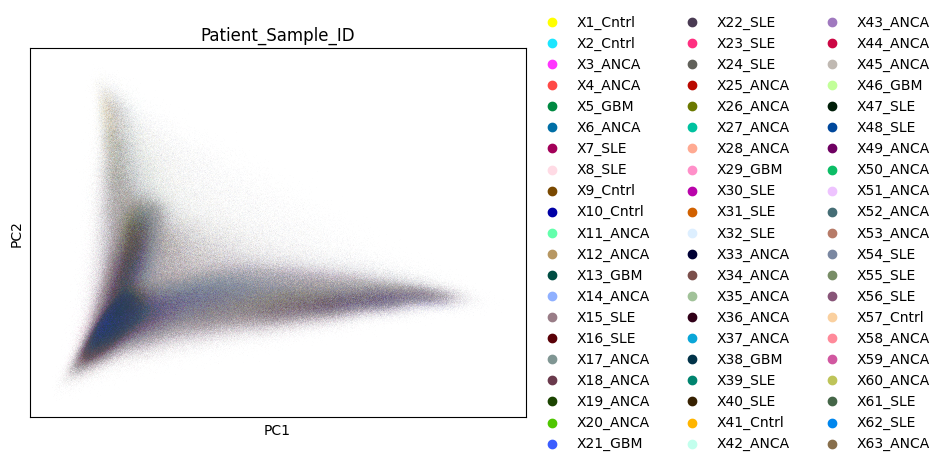

In [12]:
sc.pl.pca(
    adata,
    color="Patient_Sample_ID",
    wspace=0.4,
)

In [13]:
adata

AnnData object with n_obs × n_vars = 3222037 × 480
    obs: 'x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'avg_assignment_confidence', 'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area', 'Slide_ID', 'batch', 'Patient_Sample_ID', 'Disease', 'n_genes', 'celltype_l1', 'celltype_l1_codes', 'celltype_l1_prob', 'Biopsy_ID'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype_l1_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap', 'graph', 'Patient_Sample_ID_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [25]:
# Clustering with leiden in the embedding space using diffrent resolutions
# resolutions = np.arange(0.05, 0.4, 0.05)
# resolutions = resolutions.round(4).tolist()

resolutions = [.5]
sc.pp.neighbors(adata, use_rep="X_pca_harmony")
adata_slide, Clusters = multiple_lediden(adata, resolutions, key_added='leiden', n_jobs=20, verbos=False)

In [ ]:
resolution_best = .1

sc.pl.pca(
    adata_slide,
    color="leiden_"+str(resolution_best),
    wspace=0.4,
)

/home/byousefi/envs/nichepca/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/byousefi/envs/nichepca/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


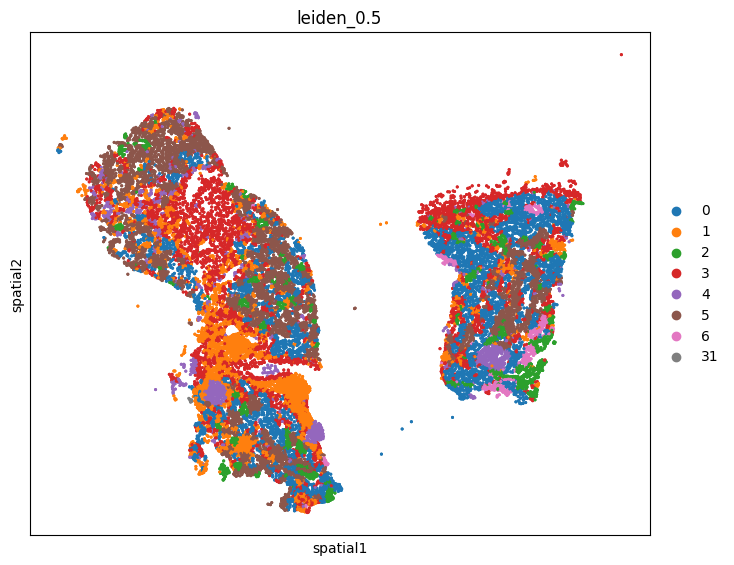

In [33]:
# adata_i.uns.pop(f'leiden_{resolution_best}_colors');
# resolution_best = .005
sample = sample_set[15]
resolution_best = .5

fig, ax = plt.subplots(figsize=(8, 8))

sq.pl.spatial_scatter(
    adata[adata.obs['Patient_Sample_ID'] == sample],
    library_id="spatial",
    shape=None,
    color=[
        "leiden_"+str(resolution_best),
        # "leiden"
    ],
    wspace=0.1,
    ax = ax
)

In [27]:
adata.obs

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,Patient_Sample_ID,Disease,n_genes,celltype_l1,celltype_l1_codes,celltype_l1_prob,Biopsy_ID,leiden_0.1,leiden_0.3,leiden_0.5
cell_CRfb095a77d-1,2285.790178,1164.057381,32.829188,1,79,2.0240,2.141,39.03,0.9975,0.9916,...,X40_SLE,SLE,55,MAC,8,0.999994,0011695 - X1,0,0,0
cell_CRfb095a77d-2,2298.342622,1219.741069,31.465535,4,32,1.0850,4.614,29.50,0.9771,0.9288,...,X40_SLE,SLE,17,PT,16,1.000000,0011695 - X1,0,0,0
cell_CRfb095a77d-3,2271.434052,1245.859500,32.062796,2,67,3.0590,2.990,21.90,0.9971,0.9884,...,X40_SLE,SLE,44,FIB,6,1.000000,0011695 - X1,3,2,2
cell_CRfb095a77d-5,2257.346907,1259.955827,31.273945,2,56,2.1420,9.229,26.14,0.9964,0.9707,...,X40_SLE,SLE,40,FIB,6,0.999103,0011695 - X1,3,2,2
cell_CRfb095a77d-6,2277.712022,1237.595244,35.395148,2,9,1.6980,3.283,5.30,0.9826,0.9400,...,X40_SLE,SLE,7,DTL,4,0.582253,0011695 - X1,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CRc71d71060-597925,2747.360264,4957.516627,24.097605,2,73,1.5480,3.617,47.15,0.9971,0.6334,...,X24_SLE,SLE,10,MAC,8,1.000000,0011216 - X2,2,3,3
cell_CRc71d71060-598041,4592.548620,1655.438877,24.254944,2,35,0.9893,1.844,35.38,0.9951,0.6206,...,X24_SLE,SLE,6,MAC,8,1.000000,0011216 - X3,2,3,3
cell_CRc71d71060-598270,8540.113826,9224.561804,19.515240,3,46,1.3870,2.667,33.16,0.9969,0.7152,...,X21_GBM,GBM,8,FIB,6,1.000000,0011216 - X9,2,3,1
cell_CRc71d71060-598508,4264.902000,2582.697217,25.121288,3,24,1.1420,5.004,21.02,0.9914,0.7517,...,X24_SLE,SLE,6,VSM/P,20,0.998473,0011216 - X3,2,3,3


In [34]:
adata.write(f"data/adata_nichepca_all_clustered.h5ad")
f"data/adata_nichepca_all_clustered.h5ad"

'data/adata_nichepca_all_clustered.h5ad'